# House sale price prediction

In [27]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.stats import skew

%matplotlib inline
# plt.style.use('ggplot')

## Read in data

In [28]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv') # no label

prices = train['SalePrice'] # separate y values
features = pd.concat([train.iloc[:, 1:-1], test.iloc[:, 1:]], keys = ['train', 'test'])
print('training samples: {}'.format(train.shape[0]))
print('testing samples: {}'.format(test.shape[0]))
print('number of features: {}'.format(train.shape[1]))
features.head()

training samples: 1460
testing samples: 1459
number of features: 81


MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
train 0          60       RL         65.0     8450   Pave   NaN      Reg   
      1          20       RL         80.0     9600   Pave   NaN      Reg   
      2          60       RL         68.0    11250   Pave   NaN      IR1   
      3          70       RL         60.0     9550   Pave   NaN      IR1   
      4          60       RL         84.0    14260   Pave   NaN      IR1   

        LandContour Utilities LotConfig      ...       ScreenPorch PoolArea  \
train 0         Lvl    AllPub    Inside      ...                 0        0   
      1         Lvl    AllPub       FR2      ...                 0        0   
      2         Lvl    AllPub    Inside      ...                 0        0   
      3         Lvl    AllPub    Corner      ...                 0        0   
      4         Lvl    AllPub       FR2      ...                 0        0   

        PoolQC Fence MiscFeature MiscVal  MoSold  YrSold  SaleType  \
train 0    NaN   NaN         NaN       0       2    2008        WD   
      1    NaN   NaN         NaN       0       5    2007        WD   
      2    NaN   NaN         NaN       0       9    2008        WD   
      3    NaN   NaN         NaN       0       2    2006        WD   
      4    NaN   NaN         NaN       0      12    2008        WD   

         SaleCondition  
train 0         Normal  
      1         Normal  
      2         Normal  
      3        Abnorml  
      4         Normal  

[5 rows x 79 columns]

## Log transform y

1.880940746034036

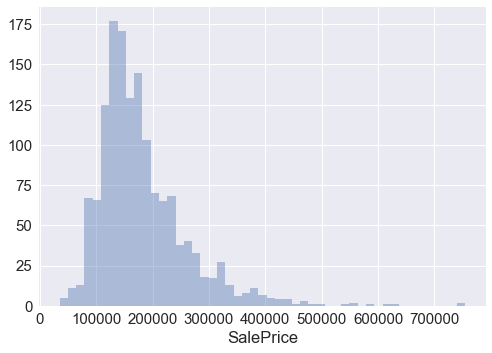

In [31]:
sb.set(font_scale=1.5)
fig, ax = plt.subplots()
sb.distplot(prices, kde=False);
skew(prices)

0.12122191311528359

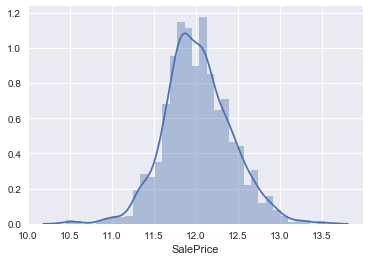

In [4]:
prices = np.log1p(prices) # log transform prices since it is positively skewed.
fig, ax = plt.subplots()
sb.distplot(prices);
skew(prices) # still positively skewed, but close to 0 enough

## Converting features to numerical

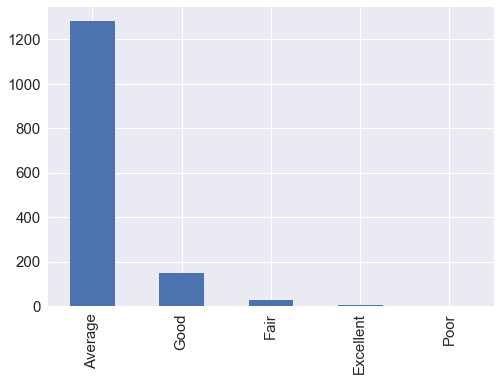

In [25]:
sb.set(font_scale=1.5)
features.loc['train', 'ExterCond'].value_counts().plot(kind='bar')
plt.xticks(np.arange(5), ('Average', 'Good', 'Fair', 'Excellent', 'Poor'));

In [18]:
temp.index = ['Typical/Average', ]

pandas.core.series.Series

In [5]:
features.isnull().sum().sort_values(ascending=False).head(10)

PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
FireplaceQu     1420
LotFrontage      486
GarageCond       159
GarageQual       159
GarageYrBlt      159
GarageFinish     159
dtype: int64

In [12]:
features.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

Let's examine these features.

- **Some of the features are categorical, but showing as numerical**. MSSubClass, type of dwelling, is a categorical variable, so change the dtype into object, same with MoSold (month sold).

- **Some of the features are ordinal**. For example, ExterQual means quality of exterior, it has several levels: excellent, good, average, fair, poor. Apparently if we only treat it as categorical, information will be lost.

In [6]:
features['MSSubClass'] = features['MSSubClass'].astype(object)
features['MoSold'] = features['MoSold'].astype(object)
features = features.replace({"MSSubClass" : {20 : "SC20", 30 : "SC30", 40 : "SC40", 45 : "SC45", 
                                             50 : "SC50", 60 : "SC60", 70 : "SC70", 75 : "SC75", 
                                             80 : "SC80", 85 : "SC85", 90 : "SC90", 120 : "SC120", 
                                             150 : "SC150", 160 : "SC160", 180 : "SC180", 190 : "SC190"},
                             "MoSold" : {1 : "Jan", 2 : "Feb", 3 : "Mar", 4 : "Apr", 5 : "May", 6 : "Jun",
                                         7 : "Jul", 8 : "Aug", 9 : "Sep", 10 : "Oct", 11 : "Nov", 12 : "Dec"}
                            })
features = features.replace({"Alley" : {"Grvl" : 1, "Pave" : 2},
                             "ExterQual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                             "ExterCond" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                             "BsmtQual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},
                             "BsmtCond" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                             "BsmtExposure" : {"No" : 0, "Mn" : 1, "Av": 2, "Gd" : 3},
                             "BsmtFinType1" : {"Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, "ALQ" : 5, "GLQ" : 6},
                             "BsmtFinType2" : {"Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, "ALQ" : 5, "GLQ" : 6},
                             "HeatingQC" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                             "KitchenQual" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                             "Functional" : {"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5, "Min2" : 6, "Min1" : 7, "Typ" : 8},
                             "FireplaceQu" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                             "GarageQual" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                             "GarageCond" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                             "PavedDrive" : {"N" : 0, "P" : 1, "Y" : 2},
                             "PoolQC" : {"Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4},
                             "Utilities" : {"ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, "AllPub" : 4}}
                           )
# note we didn't deal with NA values here.
# if a feature is converted from categorical to numerical, now we have to fill the NA using numerical values

## Fill NAs

Next let's deal with the NA values.

In [7]:
features.isnull().sum().sort_values(ascending=False).head(35)

PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
FireplaceQu     1420
LotFrontage      486
GarageCond       159
GarageQual       159
GarageYrBlt      159
GarageFinish     159
GarageType       157
BsmtCond          82
BsmtExposure      82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
BsmtHalfBath       2
Utilities          2
Functional         2
BsmtFullBath       2
BsmtFinSF2         1
BsmtFinSF1         1
Exterior2nd        1
BsmtUnfSF          1
TotalBsmtSF        1
Exterior1st        1
SaleType           1
Electrical         1
KitchenQual        1
GarageArea         1
GarageCars         1
OverallQual        0
dtype: int64

According to the data description, the NA values in **PoolQC, MiscFeature, Alley, Fence, FireplaceQu, Garage-related features, Bsmt-related features** mean *Does not exist*. So we can safely fill them with None or 0, depending on whether it is categorical or numerical type.

Now the LotFrontage has 486 missing values, these are real missing values. Since it is relatively a small portion, here we repopulate them with mean values.

In [8]:
# for these features, NA means Does not exist
features['PoolQC'] = features['PoolQC'].fillna(0)
features['MiscFeature'] = features['MiscFeature'].fillna('None')
features['Alley'] = features['Alley'].fillna(0)
features['Fence'] = features['Fence'].fillna('None')
features['FireplaceQu'] = features['FireplaceQu'].fillna(0)

# garage related features, either no garage, or missing info for garage, e.g. yearBuilt
features['GarageCond'] = features['GarageCond'].fillna(0)
features['GarageQual'] = features['GarageQual'].fillna(0)
features['GarageYrBlt'] = features['GarageYrBlt'].fillna(features['GarageYrBlt'].median()) # this is kind of weird
features['GarageFinish'] = features['GarageFinish'].fillna('None')
features['GarageType'] = features['GarageType'].fillna('None')

# basement related features, either no basement, or missing info
features['BsmtCond'] = features['BsmtCond'].fillna(0)
features['BsmtExposure'] = features['BsmtExposure'].fillna(0)
features['BsmtQual'] = features['BsmtQual'].fillna(0)
features['BsmtFinType2'] = features['BsmtFinType2'].fillna(0)
features['BsmtFinType1'] = features['BsmtFinType1'].fillna(0)
features['BsmtFullBath'] = features['BsmtFullBath'].fillna(0)
features['BsmtHalfBath'] = features['BsmtHalfBath'].fillna(0)

# missing info for masonry veneer type
features['MasVnrType'] = features['MasVnrType'].fillna(0)
features['MasVnrArea'] = features['MasVnrArea'].fillna(0)

# fill in lot frontage length with mean values (486 out of 2919)
features['LotFrontage'] = features['LotFrontage'].fillna(features['LotFrontage'].mean())

In [9]:
features.isnull().sum().sort_values(ascending=False).head(15)

MSZoning       4
Utilities      2
Functional     2
BsmtFinSF2     1
BsmtUnfSF      1
TotalBsmtSF    1
BsmtFinSF1     1
SaleType       1
KitchenQual    1
Electrical     1
Exterior1st    1
Exterior2nd    1
GarageCars     1
GarageArea     1
MasVnrArea     0
dtype: int64

Among the features that still have NA entries, **MSZoning, SaleType, Electrical, Exterior1st, Exterior2nd** are categorical features, the rest are numerical features.

In [10]:
# fill numerical values, only a few samples are affected.
features = features.fillna(features.mean()) # at most 11 samples are affected

# fill categorical values using mode of that feature
features['MSZoning'] = features['MSZoning'].fillna(features['MSZoning'].mode()[0])
features['SaleType'] = features['SaleType'].fillna(features['SaleType'].mode()[0])
features['Electrical'] = features['Electrical'].fillna(features['Electrical'].mode()[0])
features['Exterior1st'] = features['Exterior1st'].fillna(features['Exterior1st'].mode()[0])
features['Exterior2nd'] = features['Exterior2nd'].fillna(features['Exterior2nd'].mode()[0])

In [11]:
print('Number of NA values now: {}'.format(features.isnull().sum().sum()))

Number of NA values now: 0


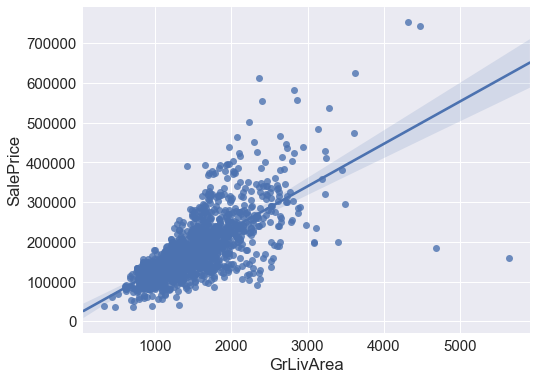

In [59]:
sb.set(font_scale=1.5)
fig, ax = plt.subplots(figsize=(8,6))
sb.regplot(features.loc['train', 'GrLivArea'], np.expm1(prices));
plt.savefig('before.png')

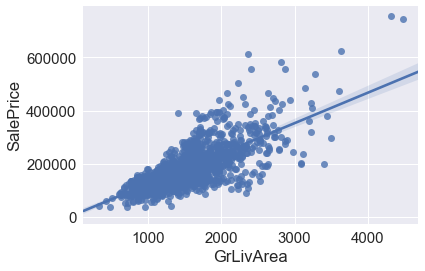

In [58]:
sb.set(font_scale=1.5)
fig, ax = plt.subplots(figsize=(6,4))
data = pd.concat([features.loc['train','GrLivArea'], pd.DataFrame(np.expm1(prices))], axis=1)
data = data[data['GrLivArea'] < 4500]
sb.regplot('GrLivArea', 'SalePrice', data);
plt.savefig('after.png')

## check correlation of features

As for now, we have 28 categorical features, 51 numerical features.

Per my knowledge, I would guess that the most promising features for determining the price of a house are size, overall quality, number of bedrooms, number of bathrooms, location, year built, basement size, garage.

In [32]:
selected_features = ['OverallQual', 'YearBuilt', 'YearRemodAdd', 'ExterQual', '2ndFlrSF',
       'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'BsmtUnfSF', 'KitchenQual', 'LotArea', 'BsmtFinSF1',
       'TotRmsAbvGrd', 'LotFrontage', 'GarageYrBlt', 'GarageArea']

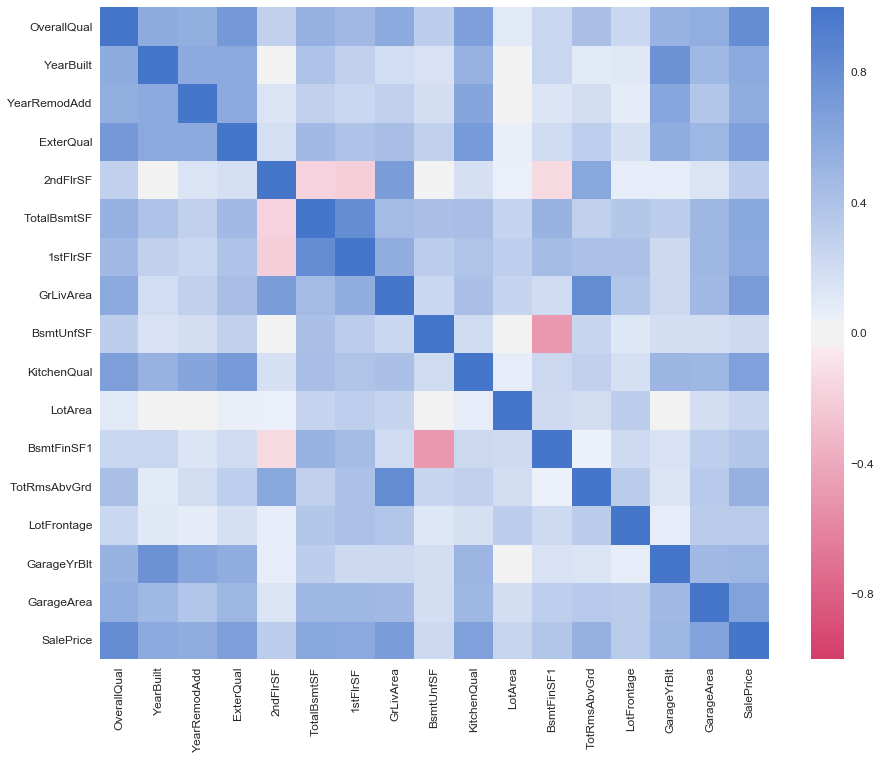

In [35]:
# correlation matrix
corr_mat = pd.concat([features.loc['train',selected_features], pd.DataFrame(prices)], axis=1).corr()
cmap = sb.diverging_palette(0, 255, sep=10, as_cmap=True) # customized colormap

sb.set(font_scale=1.2)
fig, ax = plt.subplots(figsize=(15, 12))
sb.heatmap(corr_mat, cmap=cmap);
# fig.savefig('corr.png')

In [61]:
indices = np.where(np.abs(corr_mat) > 0.85)
indices = [(corr_mat.index[x], corr_mat.columns[y], corr_mat.iloc[x, y]) for x,y in zip(*indices) if x > y]
indices

[]

All three of GarageYrBlt, GarageQual, GarageCond have about 95% correlation score, thus we really need to include only one of them when building lineare models, like Ridge, LASSO, or Elastic Net.

In fact, we might as well just pick those features that are highly correlated with SalePrice.

In [62]:
corr_price = corr_mat.loc[:'YrSold','SalePrice']
cols = corr_price[np.abs(corr_price) > 0.5].index
cols

KeyError: 'YrSold'

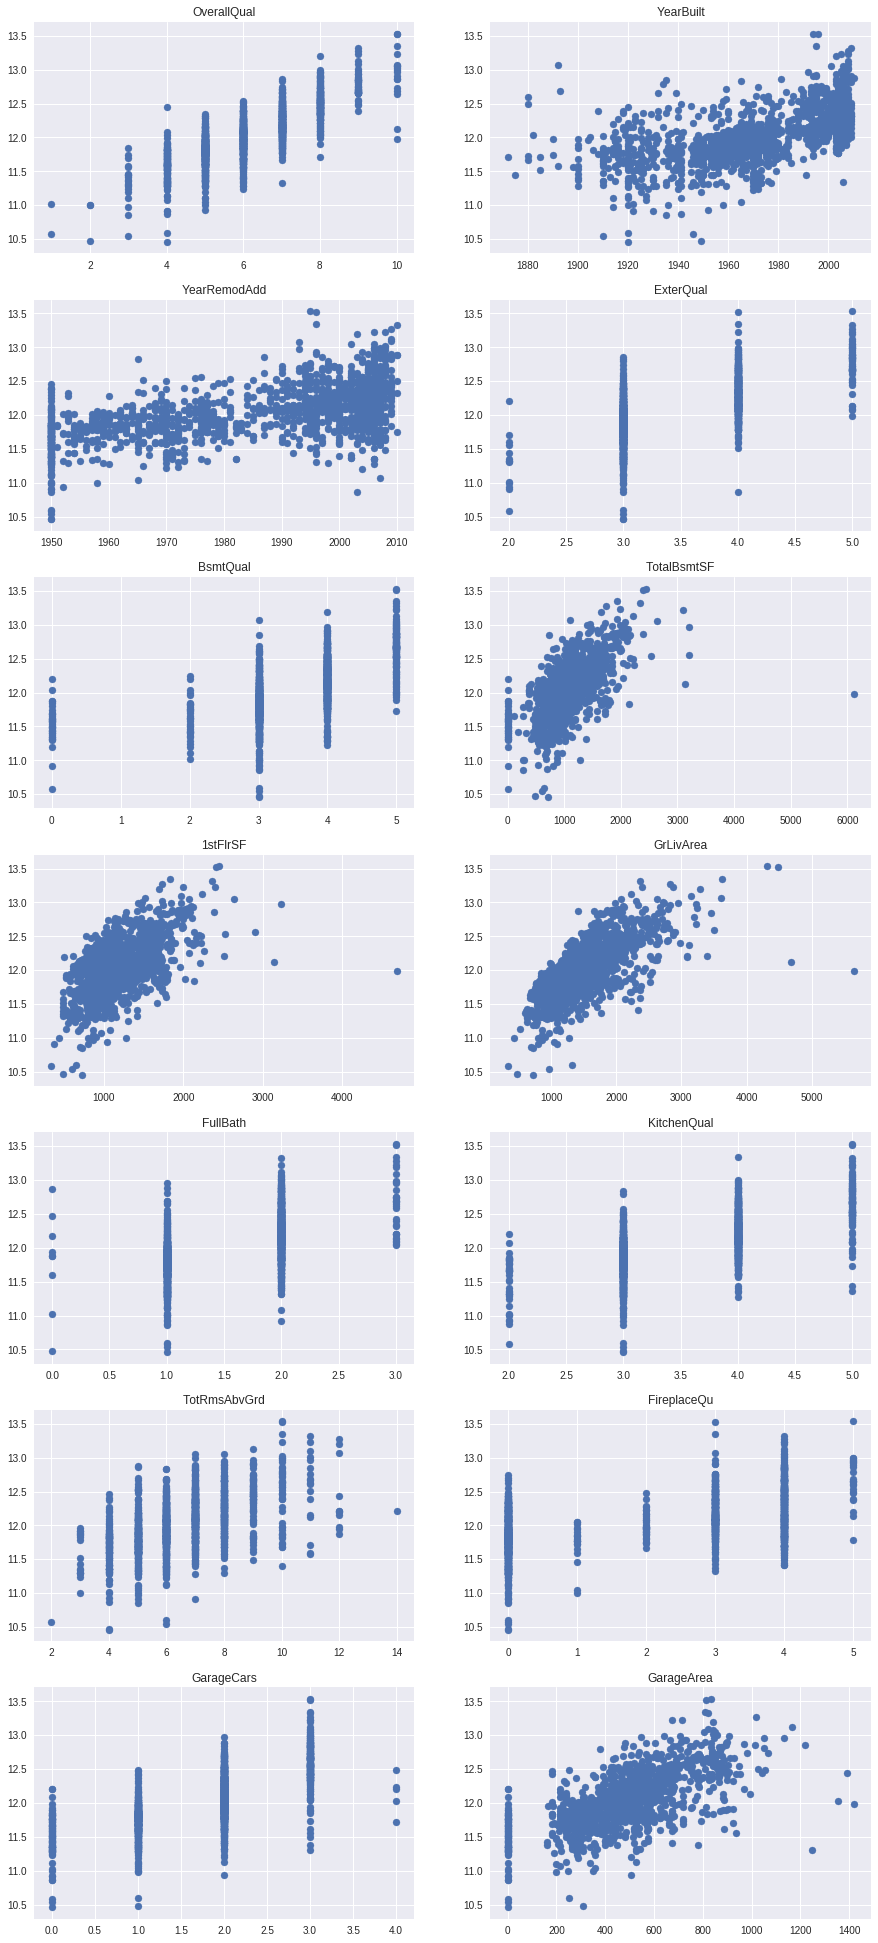

In [15]:
plt.figure(figsize=(15, 40))
for i in range(len(cols)):
    plt.subplot(8, 2, i+1)
    col = cols[i]
    plt.scatter(features.loc['train', col], prices);
    plt.title(col)

#     sb.distplot(features.loc['train', col])    

We can definitely see some positively linear correlation between input variables and the prices. (We can also observe some potential outliers as well.) So we can try to build linear models of these features as a base model for predicting SalePrice.

However, this does not tell everything about the true underlying relationship between SalePrice and affecting factors. The SalePrice could be determined by 10 features or 100 features, or it could be polynomial form or even exponential form. Even we know all that, the data set itself can contain errors collecting or logging.

As an initial step, taking log transform is usually an effective way to deal with positively skewed features, as well as picking up polynomial trends.

### log transform skewed features

In [63]:
numeric_features = features.dtypes[features.dtypes != "object"].index
skewed_features = features[numeric_features].apply(lambda x: skew(x)) #compute skewness
pos_skewed_features = skewed_features[skewed_features > 0.75].index

print(pos_skewed_features)

Index(['LotFrontage', 'LotArea', 'Alley', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtHalfBath', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'PoolQC', 'MiscVal'],
      dtype='object')


Even though we converted the ordinal features into numerical ones, there is really no need to care about their skewness since they contains very limited number of values. So here we leave them out.

In [64]:
pos_skewed_features = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtExposure', 'BsmtFinSF1', 
                       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 
                       'LowQualFinSF', 'GrLivArea', 'BsmtHalfBath', 'KitchenAbvGr', 'WoodDeckSF', 
                       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 
                       'MiscVal']
features[pos_skewed_features] = np.log1p(features[pos_skewed_features])

1. transform negative skewed data
2. polynomial features
3. select features, build linear models
4. boosting explanation

## Create dummy, Split train and test

In [65]:
X = pd.get_dummies(features)
y = prices
X_train = X.loc['train']
X_test = X.loc['test']

# since we don't the label for the test set, hold out a portion of training set as test set instead
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y, 
                                                    test_size=0.2,     # set aside 20% as test set
                                                    random_state=123)  # reproducible results

print('Number of features now: {}'.format(X_train.shape[1]))
print('Number of training samples: {}'.format(X_train.shape[0]))
print('Number of testing samples: {}'.format(X_test.shape[0]))

Number of features now: 262
Number of training samples: 1168
Number of testing samples: 292


## Modelling

In [68]:
X_test.to_csv('test-data-X.csv')
y_test.to_csv('test-data-y.csv')

In [70]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

The common performance measures for regression models are **mean squared error, mean absolute error, median absolute error, $R^2$ score, explained variance score**. Here we are going to use **root mean squared error and $R^2$ score**

In [71]:
# define my function to calculate the performance measures of regression models
def rmse_r2(y_true, y_pred, rmse_only=False):
    print('RMSE score: {:f}'.format(np.sqrt(mean_squared_error(y_true, y_pred))))
    if not rmse_only:
        print('R^2 score: {:f}'.format(r2_score(y_true, y_pred)))

### Ridge

Ridge regression adds a L2 penalty term to regular regression loss function to avoid overfitting.
But we have to decide the regularization parameter $\alpha$ beforehand. One way to address this is to use grid search method to auto tune the best $\alpha$.

In [21]:
from sklearn.linear_model import Ridge, RidgeCV

In [22]:
def get_rmse_cv(model, cv=10, X=X_train, y=y_train):
    return np.sqrt(-cross_val_score(model, X=X, y=y, 
                                    scoring="neg_mean_squared_error", cv = cv, n_jobs=-1)).mean()

In [23]:
alphas = [0.05, 0.1, 0.3, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 30, 50, 75] # list of alphas to search from

In [24]:
rmse_scores = [get_rmse_cv(Ridge(alpha = alpha)) for alpha in alphas] # obtain a cv score for each alpha

Lowest rmse score is 0.134857


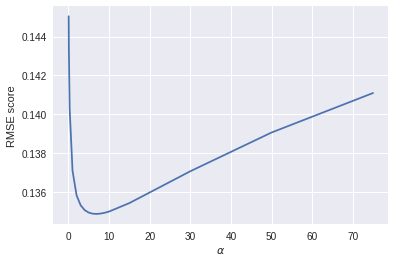

In [25]:
fig, ax = plt.subplots()
plt.plot(alphas, rmse_scores)
ax.set_xlabel(r'$\alpha$')
ax.set_ylabel('RMSE score');
print('Lowest rmse score is {:f}'.format(min(rmse_scores))) 

The best $\alpha$ is around 7 or 8, note here the RMSE score is calculated based on training set only, we still need to test it using testing data set. 

In [26]:
model_ridge = RidgeCV(alphas = [5,6,7,8,9],      # grid search for best regularization parameter alpha
                     cv=10                       # use 10-fold cross-validation when training model
                     ).fit(X_train, y_train)
rmse_r2(y_test, model_ridge.predict(X_test))
print('best alpha is {:f}'.format(model_ridge.alpha_))

RMSE score: 0.106790
R^2 score: 0.923207
best alpha is 8.000000


### Lasso

Ridge uses a L2 penalty (sum of square of all thetas) while Lasso uses a L1 penalty (sum of absolute values of all thetas). The benefit of using Lasso over Ridge is that because Lasso uses a L1 penalty, it allows some features to have zero weight, in other words, it enables us to perform feature selection automatically!

In [72]:
from sklearn.linear_model import LassoCV

In [73]:
alphas = [1e-4, 6e-4, 7e-4, 8e-4, 0.001, 0.01, 0.1, 1]

In [74]:
model_lasso = LassoCV(alphas=alphas).fit(X_train, y_train)
rmse_r2(y_test, model_lasso.predict(X_test))

RMSE score: 0.104494
R^2 score: 0.926472


In [75]:
print('The best tuned alpha for Lasso model is {}, \
much smaller than the regularization parameter in Ridge model.'.format(model_lasso.alpha_))

The best tuned alpha for Lasso model is 0.0007, much smaller than the regularization parameter in Ridge model.


In [76]:
print('Lasso picked {0} features, eliminated {1} features'.
      format(sum(model_lasso.coef_ != 0), sum(model_lasso.coef_ == 0)))

Lasso picked 92 features, eliminated 170 features


Lasso actually produced a slightly better RMSE and $R^2$ score than Ridge by using much smaller number of features. Let's check which features contribute the most to our model. 

Note the features are not standardized before training, so we cannot compare the coefficients directly. In order to compare the significance of each feature, we are going to take multiplication of the coefficients by the standard deviation of each feature as an indicator of importance of features. $$c\frac{X - \bar{X}}{\sigma} = c\sigma(X - \bar{X})$$

In [77]:
coef = pd.Series(np.std(X_train, axis=0) * model_lasso.coef_, index=X_train.columns).sort_values()

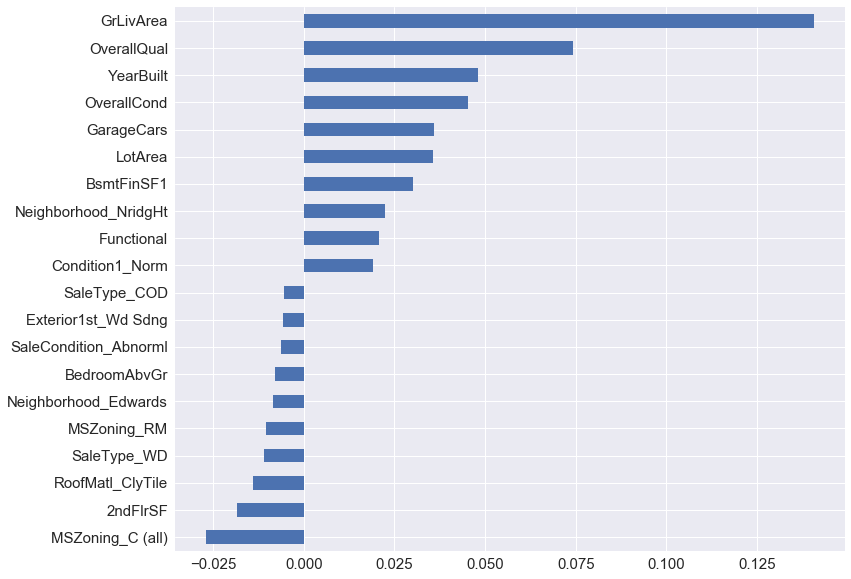

In [82]:
sb.set(font_scale=1.5)
important_features = pd.concat([coef.head(10), coef.tail(10)], axis=0)
fig, ax = plt.subplots(figsize=(12,10))
important_features.plot(kind='barh');
plt.savefig('imp_feat.png')

As expected, we can see that the most significant predicators are GroundLivingArea, OverallQuality, YearBuilt, OverallCondition, LotArea, GarageCars, BasementFinishArea. The model also tells us that some of the neighborhoods are 'rich' while others have overall lower sale prices.

There are a few surprises though, like BedroomAbvGr. The Lasso model says it has a negative impact on the sale price while we would expect that the more number of bedroom is, the higher the sale price is.

### Elastic net

Elastic Net is a combination of Ridge and Lasso, it contains both the L1 term penalty and L2 term penalty. Thus, here we need to feed in two parameters, one for each. In *sklearn*, the penalty term is defined as $$a * L1 + b * L2$$

and we need to feed $\alpha$  and $l1_{ratio}$ to the model
$$\alpha = a + b, l1_{ratio} = \frac{a}{a + b}$$

In [34]:
from sklearn.linear_model import ElasticNetCV

In [35]:
alphas = [1e-4, 5e-4, 6e-4, 7e-4, 0.001, 0.01, 0.1, 1, 10]
l1_ratio = [0.01, 0.1, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.96, 0.97, 0.98, 0.99, 1]

In [36]:
model_elas = ElasticNetCV(alphas=alphas,
                          l1_ratio=l1_ratio,
                          max_iter=1000, cv=10, n_jobs=-1).fit(X_train, y_train)

In [37]:
rmse_r2(y_test, model_elas.predict(X_test))

RMSE score: 0.104494
R^2 score: 0.926472


In [38]:
print('best alpha is {:f}, best l1_ratio is {:f}'.format(model_elas.alpha_, model_elas.l1_ratio_))
print('number of selected features is {}'.format(sum(model_elas.coef_ != 0)))

best alpha is 0.000700, best l1_ratio is 1.000000
number of selected features is 92


It looks like our Elastic Net is actually functioning as a Lasso model with l1_ratio = 1

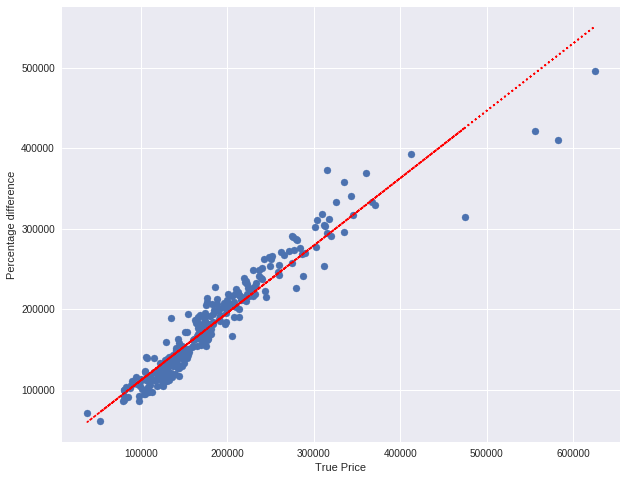

In [39]:
# Let's take a look of how our generalized linear model performs using a residual plot
fig, ax = plt.subplots(figsize=(10,8))
true = np.expm1(y_test)
pred = np.expm1(model_elas.predict(X_test))
m, b = np.polyfit(true, pred, 1)
plt.scatter(true, pred)
ax.plot(true, m*true+b, 'r:')  # help visualize
ax.set_xlabel('True Price')
ax.set_ylabel('Percentage difference');

Most of the predicted sale prices are within 20% of the true prices, but there are a dozen of houses that our model performs badly, the price differences are at 20% ~ 40%.

## Summary of GLM
Generalized linear models are parametric models, using them are relative fast. But there are assumptions to be met before applying them on the data set. E.g. we assume the residual of a feature falls under a normal distribution etc.

we can also fit data with non-linear trend by adding high-order terms or interaction of more than one features. However, their accuracies/performances depends heavily on the feature engineering. E.g. if one fails to choose the correct order of features, or include wrong set of features, the model is likely to suffer precision loss.

## Gradient boosting
Now we have tried the generalized linear models, let's try some ensemble method, like Random Forest, Gradient Boosting, Extreme Gradient Boosting etc.

Bagging method, especially tree ensembles have been very popular because they perform extremely well in many real-world problems. Another nice thing about ensemble method is that it works by combining many weak learners into one much stronger learner.

In [40]:
from sklearn.ensemble import GradientBoostingRegressor

There are generally two important types of parameters to be tuned for Gradient Boosting. One is tree-related parameters and the other is boosting parameters. 

The two commonly used boosting parameters are learning rate and the number of estimators. Generally lower values of learning rate are preferred but lower learning rate would require more number of estimators thus more comuputation time.

There are a few parameters that determine the structure of 'trees' in Gradient Boosting, like min number of samples required to be leaf node, min number of samples required to split internal node, number of features to consider when looking for split, max depth of tree etc.

In [41]:
model_gradboost = GradientBoostingRegressor().fit(X_train, y_train)
rmse_r2(y_test, model_gradboost.predict(X_test), rmse_only=True)

RMSE score: 0.110004


Not bad. Using default values for all parameters we get a pretty decent results. Now to tune the parameters, follow such guideline:
1. decide learning rate, start with 0.1
2. find optimal number of estimators given learning rate
3. fix boosting parameters, tune max_depth and min_samples_split as these two have the biggest impact on result
4. tune min_samples_leaf and max_features
5. once done, go to step 1, try lower learning rate (remember to increase number of estimators accordingly)

In [42]:
from sklearn.metrics.scorer import make_scorer
def rmse_func(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))
rmse_scorer = make_scorer(rmse_func, greater_is_better=False)

In [43]:
# finding optimal number of estimators using GridSearch
from sklearn.model_selection import GridSearchCV
estimator_1 = GradientBoostingRegressor(loss='huber', 
                                                learning_rate=0.2,
                                                min_samples_split=15,
                                                min_samples_leaf=5,
                                                max_depth=8,
                                                max_features='sqrt',
                                                subsample=0.8,
                                                random_state=123)

param_tune1 = {'n_estimators': range(20,101,10)} # 20 - 100, step 10

if 1 == 1: # this is quite time expensive
    gsearch1 = GridSearchCV(estimator_1, 
                            scoring=rmse_scorer, 
                            param_grid=param_tune1, 
                            iid=False, cv=10).fit(X_train, y_train)

In [44]:
warnings.filterwarnings('ignore')
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: -0.14600, std: 0.01509, params: {'n_estimators': 20},
  mean: -0.14243, std: 0.01525, params: {'n_estimators': 30},
  mean: -0.14120, std: 0.01682, params: {'n_estimators': 40},
  mean: -0.13988, std: 0.01698, params: {'n_estimators': 50},
  mean: -0.13943, std: 0.01651, params: {'n_estimators': 60},
  mean: -0.13960, std: 0.01668, params: {'n_estimators': 70},
  mean: -0.13948, std: 0.01610, params: {'n_estimators': 80},
  mean: -0.13967, std: 0.01617, params: {'n_estimators': 90},
  mean: -0.13967, std: 0.01613, params: {'n_estimators': 100}],
 {'n_estimators': 60},
 -0.13942694156789209)

As a starting point, the optimal number of estimators is 60 for learning rate 0.2. I'll skip the rest of tuning process, following is the final model I got:

In [45]:
model_gradboost = GradientBoostingRegressor(loss='huber', 
                                            learning_rate=0.05,
                                            n_estimators=1000,
                                            min_samples_split=15,
                                            min_samples_leaf=10,
                                            max_depth=3,
                                            max_features='sqrt',
                                            subsample=0.8,
                                            random_state=123).fit(X_train, y_train)

rmse_r2(y_test, model_gradboost.predict(X_test), rmse_only=True)

RMSE score: 0.099661


In [46]:
feat_imp = model_gradboost.feature_importances_
feat_imp = pd.Series(feat_imp/feat_imp.max() * 100, index=X_train.columns).sort_values()

NameError: name 'feat_imp' is not defined

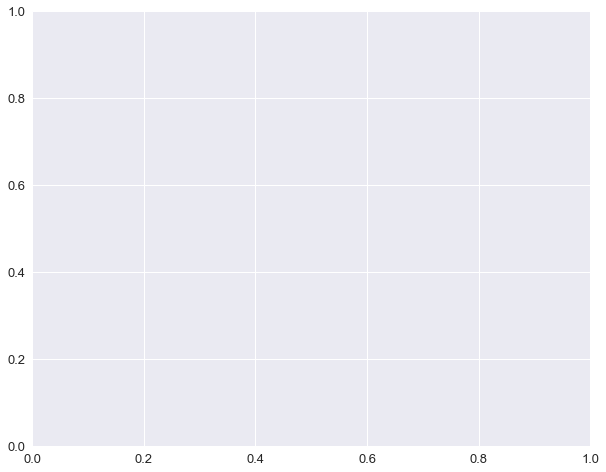

In [69]:
sb.set(font_scale=1.3)
fig, ax = plt.subplots(figsize=(10,8))
feat_imp.tail(20).plot(kind='barh');

The most important predicators showing here is similar with what we have in Generalized Linear Models. 

## Xgboost

Extreme Gradient Boosting (xgboost in python), is an optimized distributed gradient boosting library designed to be highly **efficient, flexible and portable**. It implements machine learning algorithms under the Gradient Boosting framework. 

In [48]:
import xgboost as xgb

Tuning process is similar, one can start with following model:

In [49]:
model_xgb = xgb.XGBRegressor(max_depth=8,
                             learning_rate=0.01,
                             n_estimators=2000,
                             subsample=0.2,
                             reg_alpha=0.9,
                             reg_lambda=0.7,
                             seed=123).fit(X_train, y_train)
rmse_r2(y_test, model_xgb.predict(X_test), rmse_only=True)

RMSE score: 0.115949


## Random forest

Random Forest works by continuously dividing the data into smaller groups. Note in *sklearn*, each tree in the ensemble is built from a sample drawn with replacement instead of the whole training samples. Also the split is the best split using a subset of features when splitting a node. This will increase the bias, however, the model's variance also decreases due to averaging. This essentially tries to address the typical overfitting issue of random forest. 

The biggest difference between Random Forest and Gradient Boosting is that Gradient Boosting is based on weak learners (high bias, low variance) while Random Forest uses fully grown decision trees (low bias, high variance). 

In [50]:
from sklearn.ensemble import RandomForestRegressor

In [51]:
# model_rf = RandomForestRegressor()

## Averaging results

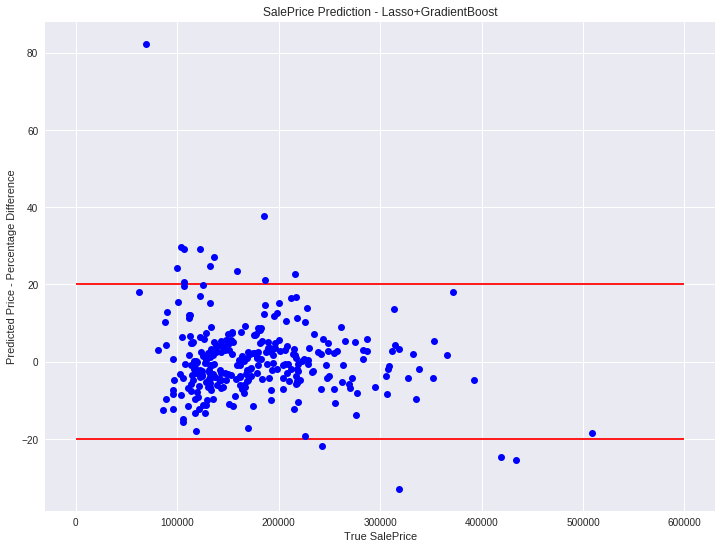

In [52]:
# don't forget to transform the price back to normal
y_pred_gb = np.expm1(model_gradboost.predict(X_test))
y_pred_elas = np.expm1(model_elas.predict(X_test))
y_pred = (y_pred_gb + y_pred_elas) / 2
y_true = np.expm1(y_test)

fig, ax = plt.subplots(figsize=(12,9))
plt.plot(y_pred, (y_pred-y_true)/y_true*100, 'bo')
ax.hlines(20, 0, 600000, 'r')
ax.hlines(-20, 0, 600000, 'r')

ax.set_title('SalePrice Prediction - Lasso+GradientBoost')
ax.set_xlabel('True SalePrice')
ax.set_ylabel('Predicted Price - Percentage Difference');